In [841]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [842]:
df_train=pd.read_csv("C:\\Users\\Shruti Udagire\\Supervised Regression\\Practice\\Comp\\train.csv")
df_test=pd.read_csv("C:\\Users\\Shruti Udagire\\Supervised Regression\\Practice\\Comp\\test.csv")
df_train=df_train.sample(frac=1,random_state=1)
df_test=df_test.sample(frac=1,random_state=1)
df_train.drop('Id',axis=1,inplace=True)
df_test.drop('Id',axis=1,inplace=True)

In [843]:
print(df_train.shape)
df_train.head(2)

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
258,60,RL,80.0,12435,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,231500
267,75,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,179500


In [844]:
print(df_test.shape)
df_test.head(2)

(1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1108,20,RL,NaN,21579,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,9,2007,CWD,Normal
111,20,RL,75.0,9525,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal


In [845]:
for i,j in zip(df_train.isnull().sum(),df_train.isnull().sum().index):
    if(i>0):
        print(i,j)

259 LotFrontage
1369 Alley
8 MasVnrType
8 MasVnrArea
37 BsmtQual
37 BsmtCond
38 BsmtExposure
37 BsmtFinType1
38 BsmtFinType2
1 Electrical
690 FireplaceQu
81 GarageType
81 GarageYrBlt
81 GarageFinish
81 GarageQual
81 GarageCond
1453 PoolQC
1179 Fence
1406 MiscFeature


In [846]:
for i,j in zip(df_test.isnull().sum(),df_test.isnull().sum().index):
    if(i>0):
        print(i,j)

4 MSZoning
227 LotFrontage
1352 Alley
2 Utilities
1 Exterior1st
1 Exterior2nd
16 MasVnrType
15 MasVnrArea
44 BsmtQual
45 BsmtCond
44 BsmtExposure
42 BsmtFinType1
1 BsmtFinSF1
42 BsmtFinType2
1 BsmtFinSF2
1 BsmtUnfSF
1 TotalBsmtSF
2 BsmtFullBath
2 BsmtHalfBath
1 KitchenQual
2 Functional
730 FireplaceQu
76 GarageType
78 GarageYrBlt
78 GarageFinish
1 GarageCars
1 GarageArea
78 GarageQual
78 GarageCond
1456 PoolQC
1169 Fence
1408 MiscFeature
1 SaleType


As per description NA means No Basement for 'PoolQC','Fence','MiscFeature','Alley'

In [847]:
df_train.loc[(df_train['PoolQC'].isnull()),'PoolQC']='None'
df_test.loc[(df_test['PoolQC'].isnull()),'PoolQC']='None'
df_train.loc[(df_train['Fence'].isnull()),'Fence']='None'
df_test.loc[(df_test['Fence'].isnull()),'Fence']='None'
df_train.loc[(df_train['MiscFeature'].isnull()),'MiscFeature']='None'
df_test.loc[(df_test['MiscFeature'].isnull()),'MiscFeature']='None'
df_train.loc[(df_train['Alley'].isnull()),'Alley']='No alley access'
df_test.loc[(df_test['Alley'].isnull()),'Alley']='No alley access'

There is  a linear relastionship between LotFrontage and LotArea

Hence filled missing values for LotFrontage considering LotArea

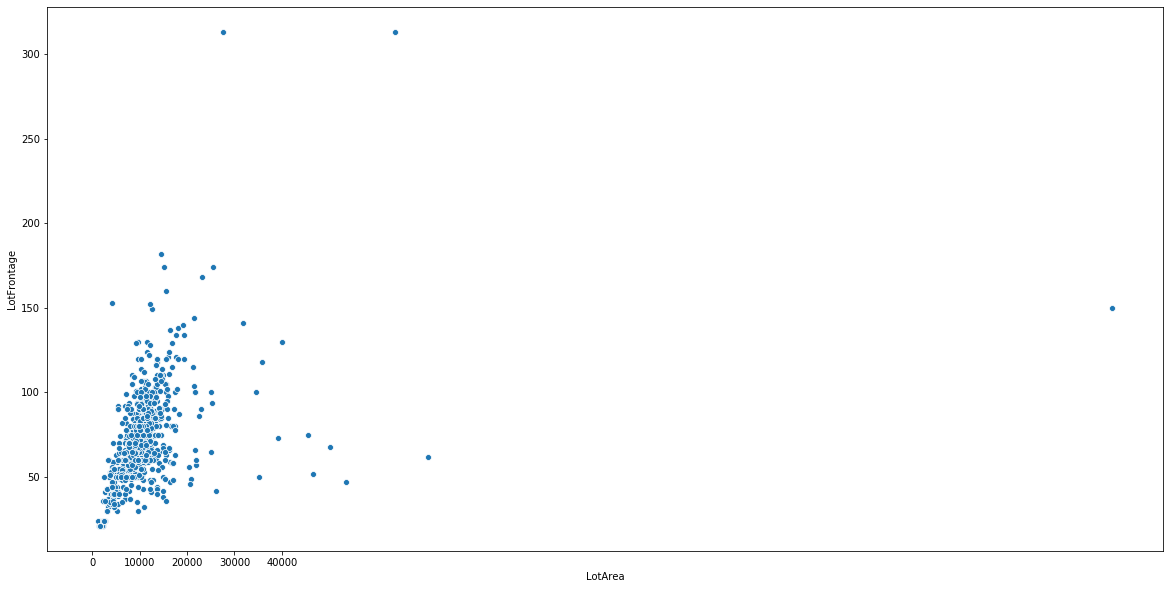

In [848]:
plt.figure(figsize=(20,10))
plt.xticks(np.arange(0,50000,10000))
sns.scatterplot(df_train['LotArea'],df_train['LotFrontage'])

In [849]:
df_train.describe()[['LotFrontage','LotArea']]

,LotFrontage,LotArea
count,1201.000000,1460.000000
mean,70.049958,10516.828082
std,24.284752,9981.264932
min,21.000000,1300.000000
25%,59.000000,7553.500000
50%,69.000000,9478.500000
75%,80.000000,11601.500000
max,313.000000,215245.000000


In [850]:
df_train.loc[(df_train['LotArea']>1300) & (df_train['LotArea']<7553) & (df_train['LotFrontage'].isnull()),'LotFrontage']=df_train[(df_train['LotArea']>1300) & (df_train['LotArea']<7553) ]['LotFrontage'].mean()
df_train.loc[(df_train['LotArea']>7553) & (df_train['LotArea']<9478) & (df_train['LotFrontage'].isnull()),'LotFrontage']=df_train[(df_train['LotArea']>7553) & (df_train['LotArea']<9478) ]['LotFrontage'].mean()
df_train.loc[(df_train['LotArea']>9478) & (df_train['LotArea']<11601) & (df_train['LotFrontage'].isnull()),'LotFrontage']=df_train[(df_train['LotArea']>9478) & (df_train['LotArea']<11601) ]['LotFrontage'].mean()
df_train.loc[(df_train['LotArea']>11601) & (df_train['LotFrontage'].isnull()),'LotFrontage']=df_train[(df_train['LotArea']>11601)]['LotFrontage'].mean()

In [851]:
df_test.describe()[['LotFrontage','LotArea']]

,LotFrontage,LotArea
count,1232.000000,1459.000000
mean,68.580357,9819.161069
std,22.376841,4955.517327
min,21.000000,1470.000000
25%,58.000000,7391.000000
50%,67.000000,9399.000000
75%,80.000000,11517.500000
max,200.000000,56600.000000


In [852]:
df_test.loc[(df_test['LotArea']>1470) & (df_test['LotArea']<7391) & (df_test['LotFrontage'].isnull()),'LotFrontage']=df_test[(df_test['LotArea']>1470) & (df_test['LotArea']<7391) ]['LotFrontage'].mean()
df_test.loc[(df_test['LotArea']>7391) & (df_test['LotArea']<9399) & (df_test['LotFrontage'].isnull()),'LotFrontage']=df_test[(df_test['LotArea']>7391) & (df_test['LotArea']<9399) ]['LotFrontage'].mean()
df_test.loc[(df_test['LotArea']>9399) & (df_test['LotArea']<11517) & (df_test['LotFrontage'].isnull()),'LotFrontage']=df_test[(df_test['LotArea']>9399) & (df_test['LotArea']<11517) ]['LotFrontage'].mean()
df_test.loc[(df_test['LotArea']>11517) & (df_test['LotFrontage'].isnull()),'LotFrontage']=df_test[(df_test['LotArea']>11517)]['LotFrontage'].mean()

MasVnrArea and MasVnrType are related to each other

Many of the missing values are none hence with 0

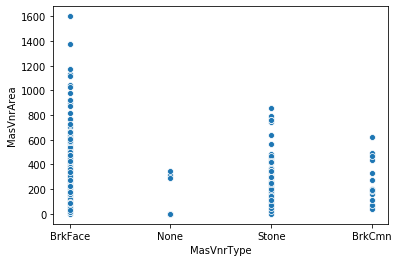

In [853]:
sns.scatterplot(df_train['MasVnrType'],df_train['MasVnrArea'])

In [854]:
df_train.loc[(df_train['MasVnrArea'].isnull()),'MasVnrArea']=df_train[(df_train['MasVnrType']=='None')]['MasVnrArea'].value_counts().index[0]
df_test.loc[(df_test['MasVnrArea'].isnull()),'MasVnrArea']=df_test[(df_test['MasVnrType']=='None')]['MasVnrArea'].value_counts().index[0]

As per description NA means No Basement for ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

In [855]:
for i in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    df_train.loc[(df_train[i].isnull()),i]='No Basement'
    df_test.loc[(df_test[i].isnull()),i]='No Basement'
    

As per description NA means No Fireplace for FireplaceQu

For ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond'] NA means NO Garage

In [856]:
df_train.loc[(df_train['FireplaceQu'].isnull()),'FireplaceQu']='No Fireplace'
df_test.loc[(df_test['FireplaceQu'].isnull()),'FireplaceQu']='No Fireplace'

In [857]:
for i in ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']:
    df_train.loc[(df_train[i].isnull()),i]='No Garage'
    df_test.loc[(df_test[i].isnull()),i]='No Garage'

BsmtFinSF1 , BsmtFinSF2 , BsmtUnfSF , TotalBsmtSF , GarageArea   filling mean values

In [858]:
df_test.loc[(df_test['BsmtFinSF1'].isnull()),'BsmtFinSF1']=df_test['BsmtFinSF1'].mean()
df_test.loc[(df_test['BsmtFinSF2'].isnull()),'BsmtFinSF2']=df_test['BsmtFinSF2'].mean()
df_test.loc[(df_test['TotalBsmtSF'].isnull()),'TotalBsmtSF']=df_test['TotalBsmtSF'].mean()
df_test.loc[(df_test['BsmtUnfSF'].isnull()),'BsmtUnfSF']=df_test['BsmtUnfSF'].mean()
df_test.loc[(df_test['GarageArea'].isnull()),'GarageArea']=df_test['GarageArea'].mean()

FOllowing are categorical and are imputed by mode
Electrical,MSZoning,Utilities,Exterior1st,Exterior2nd,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,GarageCars,SaleType,MasVnrType


In [859]:
df_train.loc[(df_train['MasVnrType'].isnull()),'MasVnrType']=df_train['MasVnrType'].value_counts().index[0]
df_test.loc[(df_test['MasVnrType'].isnull()),'MasVnrType']=df_test['MasVnrType'].value_counts().index[0]

In [860]:
df_train.loc[(df_train['Electrical'].isnull()),'Electrical']=df_train['Electrical'].value_counts().index[0]
df_test.loc[(df_test['Electrical'].isnull()),'Electrical']=df_test['Electrical'].value_counts().index[0]

In [861]:
df_test.loc[(df_test['MSZoning'].isnull()),'MSZoning']=df_test['MSZoning'].value_counts().index[0]
df_test.loc[(df_test['Utilities'].isnull()),'Utilities']=df_test['Utilities'].value_counts().index[0]

In [862]:
df_test.loc[(df_test['Exterior1st'].isnull()),'Exterior1st']=df_test['Exterior1st'].value_counts().index[0]
df_test.loc[(df_test['Exterior2nd'].isnull()),'Exterior2nd']=df_test['Exterior2nd'].value_counts().index[0]

In [863]:
df_test.loc[(df_test['BsmtFullBath'].isnull()),'BsmtFullBath']=df_test['BsmtFullBath'].value_counts().index[0]
df_test.loc[(df_test['BsmtHalfBath'].isnull()),'BsmtHalfBath']=df_test['BsmtHalfBath'].value_counts().index[0]

In [864]:
df_test.loc[(df_test['KitchenQual'].isnull()),'KitchenQual']=df_test['KitchenQual'].value_counts().index[0]
df_test.loc[(df_test['Functional'].isnull()),'Functional']=df_test['Functional'].value_counts().index[0]
df_test.loc[(df_test['GarageCars'].isnull()),'GarageCars']=df_test['GarageCars'].value_counts().index[0]
df_test.loc[(df_test['SaleType'].isnull()),'SaleType']=df_test['SaleType'].value_counts().index[0]


In [865]:
df_train.to_csv('SalesPrice-Train.csv') 
df_test.to_csv('SalesPrice-Test.csv') 

In [953]:
df_train=pd.read_csv("C:\\Users\\Shruti Udagire\\Supervised Regression\\Practice\\Comp\\SalesPrice-Train.csv")
df_train=df_train.sample(frac=1,random_state=1)
df_train.drop('Unnamed: 0',axis=1,inplace=True)
df_test=pd.read_csv("C:\\Users\\Shruti Udagire\\Supervised Regression\\Practice\\Comp\\SalesPrice-Test.csv")
df_test.sample(frac=1,random_state=1)
df_test.drop('Unnamed: 0',axis=1,inplace=True)

In [954]:
df_train=df_train.reset_index()
df_test=df_test.reset_index()

In [955]:
df_train.drop('index',axis=1,inplace=True)#(0-1459)
df_test.drop('index',axis=1,inplace=True)

In [956]:
df_combine=pd.concat([df_train,df_test],axis=0)
df_combine

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,1698,0,0,No alley access,3,1Fam,TA,No,1234.0,0.0,...,WD,0,Pave,8,1698.0,AllPub,327,2007,2008,2009
1,999,0,0,No alley access,3,1Fam,TA,Av,867.0,0.0,...,WD,0,Pave,6,944.0,AllPub,144,1961,2007,2008
2,1656,0,0,No alley access,3,1Fam,TA,Av,24.0,0.0,...,WD,0,Pave,7,1656.0,AllPub,0,2006,2006,2007
3,1182,1142,0,No alley access,4,1Fam,TA,No,998.0,0.0,...,New,0,Pave,11,1175.0,AllPub,147,2005,2006,2006
4,964,925,0,No alley access,4,2fmCon,TA,No,0.0,0.0,...,WD,0,Pave,9,925.0,AllPub,0,1910,1950,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1786,0,0,No alley access,3,1Fam,TA,Gd,1538.0,0.0,...,WD,0,Pave,6,1778.0,AllPub,182,2002,2003,2008
1455,1151,0,0,Pave,2,TwnhsE,TA,No,60.0,0.0,...,New,0,Pave,5,1141.0,AllPub,0,2006,2007,2007
1456,864,0,0,No alley access,3,1Fam,TA,No,682.0,0.0,...,COD,0,Pave,5,864.0,AllPub,196,1955,1955,2007
1457,1223,1089,0,No alley access,4,1Fam,TA,No,913.0,0.0,...,WD,0,Pave,8,1177.0,AllPub,298,1999,1999,2009


In [957]:
# columns=['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
#          'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
#           'Foundation','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','CentralAir','Electrical','Functional'
#           'GarageType','GarageFinish','PavedDrive','Fence','MiscFeature','SaleType','SaleCondition']
df_dummies=pd.get_dummies(df_combine[['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
          'Foundation','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','CentralAir','Electrical','Functional',
          'GarageType','GarageFinish','PavedDrive','Fence','MiscFeature','SaleType','SaleCondition']],drop_first=True)
df_combine=pd.concat([df_dummies,df_combine],axis=1)

In [958]:
df_combine.drop(['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
          'Foundation','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','CentralAir','Electrical','Functional',
          'GarageType','GarageFinish','PavedDrive','Fence','MiscFeature','SaleType','SaleCondition'],axis=1,inplace=True)

In [959]:
df_combine

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,PoolArea,PoolQC,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,0,0,1,0,1,1,0,0,0,0,...,0,None,320000.0,0,8,1698.0,327,2007,2008,2009
1,0,0,1,0,1,1,0,0,0,0,...,0,None,178400.0,0,6,944.0,144,1961,2007,2008
2,1,0,0,0,1,1,0,0,0,1,...,0,None,249700.0,0,7,1656.0,0,2006,2006,2007
3,0,0,1,0,1,1,0,0,0,0,...,0,None,345000.0,0,11,1175.0,147,2005,2006,2006
4,0,0,0,1,1,1,0,0,0,0,...,0,None,122000.0,0,9,925.0,0,1910,1950,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,1,0,1,1,0,1,0,0,...,0,None,NaN,0,6,1778.0,182,2002,2003,2008
1455,1,0,0,0,1,0,1,0,0,0,...,0,None,NaN,0,5,1141.0,0,2006,2007,2007
1456,0,0,1,0,1,1,0,0,0,1,...,0,None,NaN,0,5,864.0,196,1955,1955,2007
1457,0,0,1,0,1,1,0,1,0,0,...,0,None,NaN,0,8,1177.0,298,1999,1999,2009


In [960]:
# One hot encoding
# 'OverallQual','OverallCond'
df_combine[['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']]

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,Ex,TA,Ex,TA,Ex,Ex,Gd,TA,TA,None
1,Ex,TA,TA,TA,Gd,Ex,No Fireplace,TA,TA,None
2,Gd,TA,Gd,TA,Ex,Gd,No Fireplace,TA,TA,None
3,Ex,TA,Ex,TA,Ex,Ex,Gd,TA,TA,None
4,Fa,TA,TA,TA,TA,TA,Gd,TA,TA,None
...,...,...,...,...,...,...,...,...,...,...
1454,Gd,TA,Ex,TA,Ex,Gd,Gd,TA,TA,None
1455,Gd,TA,Gd,TA,Ex,Gd,No Fireplace,TA,TA,None
1456,TA,TA,TA,TA,TA,TA,No Fireplace,TA,TA,None
1457,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA,None


In [961]:
from sklearn.preprocessing import LabelEncoder 
list2=['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']
le = LabelEncoder() 
for i in list2:
    df_combine[i]= le.fit_transform(df_combine[i]) 


In [962]:
df_combine.loc[(df_combine['GarageYrBlt']=='No Garage'),'GarageYrBlt']=0
df_combine.shape

(2919, 230)

In [963]:
# splitting the data as it was previously into train and test
df_train=df_combine.iloc[0:1459,:]
df_test=df_combine.iloc[1460:,:]

In [964]:
df_test.drop('SalePrice',axis=1,inplace=True)

In [965]:
X=df_train.drop('SalePrice',axis=1)
y=df_train['SalePrice']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)
X_test_scaled=scaler.transform(df_test)


# RANDOMFOREST REGRESSION

In [966]:
import sklearn

In [967]:
X=pd.DataFrame(X_scaled,columns=X.columns)
X_test=pd.DataFrame(X_test_scaled,columns=df_test.columns)

In [978]:
# Here we are telling the model to create 100 decision tress and make random forest and calculated the score etc
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
rfr=RandomForestRegressor(random_state=3)
params={'n_estimators':sp_randint(50,300),
        'max_features':sp_randint(1,50),
        'max_depth':sp_randint(2,30),
        'min_samples_split':sp_randint(2,20),
        'min_samples_leaf':sp_randint(1,20)
       }
rsearch_rfc=RandomizedSearchCV(rfr,param_distributions=params,cv=3,scoring='neg_mean_squared_error',random_state=3)
rsearch_rfc.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [979]:
rsearch_rfc.best_params_

{'max_depth': 28,
 'max_features': 18,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 241}

In [980]:
rfr=RandomForestRegressor(**rsearch_rfc.best_params_)
rfr.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=28, max_features=18, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=241, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [981]:
y_train_predict=rfr.predict(X)
mse = mean_squared_error(y,y_train_predict)
rmse=np.sqrt(mse)
rmse


21028.900953234

In [983]:
y_test_predict=rfr.predict(X_test_scaled)
y_test_predict

array([189110.71157668, 143851.39410436, 156091.03342261, ...,
       122530.88552787, 267013.20914206, 218434.63456761])

In [985]:
predictions=pd.DataFrame(y_test_predict)
df_test

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,OverallQual,PoolArea,PoolQC,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,0,0,1,0,1,1,0,0,0,0,...,6,0,3,0,7,1488.0,0,1968,1968,2007
1,0,0,1,0,1,1,0,0,0,1,...,5,0,3,0,5,1172.0,240,1954,1998,2010
2,0,0,1,0,1,1,0,0,0,1,...,5,0,3,0,6,1444.0,0,1952,1952,2006
3,0,0,1,0,1,1,0,0,0,0,...,5,0,3,0,6,1160.0,690,1977,1994,2007
4,0,0,0,1,1,1,0,0,0,1,...,5,0,3,0,5,1072.0,0,1925,1950,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,1,0,1,1,0,1,0,0,...,8,0,3,0,6,1778.0,182,2002,2003,2008
1455,1,0,0,0,1,0,1,0,0,0,...,8,0,3,0,5,1141.0,0,2006,2007,2007
1456,0,0,1,0,1,1,0,0,0,1,...,4,0,3,0,5,864.0,196,1955,1955,2007
1457,0,0,1,0,1,1,0,1,0,0,...,7,0,3,0,8,1177.0,298,1999,1999,2009


# LASSO

In [925]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=181)
lasso.fit(X,y)
train_score=lasso.score(X,y)
coeff_used = np.sum(lasso.coef_!=0)
print("number of features used: ", coeff_used)
print(train_score)
prediction=lasso.predict(X)
mse = mean_squared_error(y,prediction)
rmse=np.sqrt(mse)
rmse

number of features used:  167
0.9201763952370406


22444.05660089055

In [926]:
prediction

array([312809.031014  , 210130.26871037, 240319.79326106, ...,
       147913.21227051, 250134.72789576, 108538.00612106])

In [ ]:
# alpha=np.arange(0,250,1)
# for i in alpha:
#     lasso001 = Lasso(alpha=181)
#     lasso001.fit(X,y)
#     train_score001=lasso001.score(X,y)

#     coeff_used001 = np.sum(lasso001.coef_!=0)

#     print("training score for alpha ",i," ",train_score001)
#     print("number of features used:  ",i," ", coeff_used001)

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA()
# X_train_pca = pca.fit_transform(X)
# X_test_pca = pca.transform(X_test)


In [ ]:
# cov_matrix = np.cov(X_train_pca.T)
# eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
# eig_vals

In [ ]:
# tot = sum(eig_vals)
# var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
# cum_var_exp = np.cumsum(var_exp)
# print("Cumulative Variance Explained", cum_var_exp)
# len(cum_var_exp)

In [ ]:
# pca = PCA(n_components=229)
# X_train = pca.fit_transform(X_train_pca)
# X_test = pca.transform(X_test_pca)
# import warnings 
# warnings.filterwarnings('ignore')
# import statsmodels.api as sm

# X_constant = sm.add_constant(X_train)
# lin_reg = sm.OLS(y,X_constant).fit()
# lin_reg.summary()

In [ ]:
# from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(y, lin_reg.predict())
# rmse=np.sqrt(mse)
# rmse

In [ ]:
# pca = PCA(n_components=200)
# X_train = pca.fit_transform(X_train_pca)
# X_test = pca.transform(X_test_pca)
# import warnings 
# warnings.filterwarnings('ignore')
# import statsmodels.api as sm

# X_constant = sm.add_constant(X_train)
# lin_reg = sm.OLS(y,X_constant).fit()
# lin_reg.summary()

In [ ]:
# from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(y, lin_reg.predict())
# rmse=np.sqrt(mse)
# rmse

In [ ]:
# pca = PCA(n_components=190)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
# import warnings 
# warnings.filterwarnings('ignore')
# import statsmodels.api as sm

# X_constant = sm.add_constant(X_train)
# lin_reg = sm.OLS(y_train,X_constant).fit()
# lin_reg.summary()

In [ ]:
# from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(y_train, lin_reg.predict())
# rmse=np.sqrt(mse)
# rmse

# OLS

In [927]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     68.24
Date:                Tue, 14 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:19:37   Log-Likelihood:                -16636.
No. Observations:                1459   AIC:                         3.372e+04
Df Residuals:                    1233   BIC:                         3.492e+04
Df Model:                         225                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.809e+05    616.820    293.343      0.000     1.8e+05    1.82e+05
MSZoning_FV               5774.1404   2545.567      2.268      0.023     780.018    1.08e+04
MSZoning_RH               2515.8884   1277.827      1.969      0.049       8.933    5022.844
MSZoning_RL               9489.1834   4274.206      2.220      0.027    1103.663    1.79e+04
MSZoning_RM               7916.9107   3498.521      2.263      0.024    1053.199    1.48e+04
Street_Pave               2198.5869    764.011      2.878      0.004     699.681    3697.493
Alley_No alley access     -250.1143   1046.790     -0.239      0.811   -2303.801    1803.573
Alley_Pave                 104.0957   1023.943      0.102      0.919   -1904.768    2112.960
LotShape_IR2              1391.2673    712.698      1.952      0.051      -6.968    2789.503
LotShape_IR3               516.9213    754.232      0.685      0.493    -962.799    1996.641
LotShape_Reg               997.6874    799.290      1.248      0.212    -570.431    2565.806
LandContour_HLS           1915.4418    959.675      1.996      0.046      32.664    3798.219
LandContour_Low          -1888.4026   1009.175     -1.871      0.062   -3868.293      91.488
LandContour_Lvl           2004.8225   1145.520      1.750      0.080    -242.562    4252.207
Utilities_NoSeWa         -1158.0289    714.815     -1.620      0.105   -2560.416     244.359
LotConfig_CulDSac         2210.6126    837.745      2.639      0.008     567.050    3854.176
LotConfig_FR2            -1044.7728    733.706     -1.424      0.155   -2484.223     394.678
LotConfig_FR3             -861.2043    680.269     -1.266      0.206   -2195.817     473.408
LotConfig_Inside          -318.6997    831.497     -0.383      0.702   -1950.004    1312.605
LandSlope_Mod             1238.8357    844.637      1.467      0.143    -418.249    2895.921
LandSlope_Sev            -2709.0714   1032.337     -2.624      0.009   -4734.403    -683.739
Neighborhood_Blueste       422.6112    738.513      0.572      0.567   -1026.269    1871.492
Neighborhood_BrDale       1145.9300   1174.112      0.976      0.329   -1157.548    3449.408
Neighborhood_BrkSide      -515.9122   1902.381     -0.271      0.786   -4248.174    3216.349
Neighborhood_ClearCr     -1819.2142   1305.306     -1.394      0.164   -4380.081     741.653
Neighborhood_CollgCr     -3063.3099   2282.477     -1.342      0.180   -7541.279    1414.659
Neighborhood_Crawfor      1900.9747   1621.540      1.172      0.241   -1280.308    5082.258
Neighborhood_Edwards     -3817.5722   2086.602     -1.830      0.068   -7911.255     276.111
Neighborhood_Gilbert     -2327.3045   1793.573     -1.298      0.195   -5846.097    1191.488
Neighborhood_IDOTRR      -1524.3105   1733.361     -0.879      0.379   -4924.974    1876.352
Neighborhood_M

In [928]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, lin_reg.predict())
rmse=np.sqrt(mse)
rmse

21659.064732374187

# Using VIF and then removing the columns and selevting the significant once

In [929]:
X1=X.copy()


In [930]:
def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(X_constant.values, j) for j in range(X_constant.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(X_constant.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [931]:
train_out = calculate_vif(X1)

Iteration no.
1
[1.0, 17.03149539541778, 4.29168433457397, 48.016941640936, 32.1701116633388, 1.5342041013150125, 2.8800691893036667, 2.7557230582085643, 1.3350425605947154, 1.4951803905875154, 1.679160642302491, 2.420652442097026, 2.6768043396541947, 3.448969027489646, 1.342982891241391, 1.8446210838128907, 1.4149073501446765, 1.2163120389410191, 1.8172076940404462, 1.8750982372228573, 2.8010889529202343, 1.4335058076501719, 3.623284949190019, 9.512147099731564, 4.4782507564379, 13.692935390462127, 6.9109715034319406, 11.443606575409014, 8.455157470533935, 7.896990872713212, 4.075921662132324, 6.0026096127322575, 22.442839807550726, 3.390731320286526, 8.557339568577605, 5.4708134577664636, 7.850708901506019, 18.369686046303766, 4.428613658716029, 8.910511243807942, 6.622651939776235, 12.732438022621697, 3.2707162174199462, 4.715605248084675, 2.328329869503093, 3.6034276897880657, 5.63675214119123, 1.5365244804456708, 1.9600401968746013, 1.589214449213085, 2.343777155852211, 1.18527141

Iteration no.
3
[17.03149539541775, 4.291684334573975, 48.016941640936, 32.1701116633388, 1.5342041013150132, 2.880069189303663, 2.7557230582085643, 1.3350425605947154, 1.495180390587516, 1.679160642302491, 2.4206524420970275, 2.6768043396541947, 3.448969027489646, 1.3429828912413913, 1.8446210838128907, 1.4149073501446767, 1.216312038941021, 1.8172076940404445, 1.8750982372228573, 2.8010889529202334, 1.4335058076501732, 3.6232849491900163, 9.512147099731553, 4.478250756437911, 13.692935390462127, 6.910971503431935, 11.44360657540903, 8.455157470533926, 7.8969908727132045, 4.075921662132326, 6.002609612732262, 22.44283980755078, 3.39073132028653, 8.557339568577614, 5.47081345776646, 7.850708901506019, 18.369686046303805, 4.428613658716033, 8.910511243807942, 6.62265193977623, 12.732438022621697, 3.2707162174199413, 4.715605248084669, 2.328329869503089, 3.6034276897880657, 5.636752141191226, 1.536524480445672, 1.9600401968746026, 1.589214449213084, 2.343777155852211, 1.185271418336013, 

Iteration no.
5
[17.03149539541778, 4.291684334573972, 48.016941640936, 32.1701116633388, 1.5342041013150123, 2.880069189303663, 2.7557230582085634, 1.3350425605947154, 1.4951803905875165, 1.679160642302491, 2.4206524420970275, 2.6768043396541947, 3.4489690274896447, 1.3429828912413913, 1.8446210838128902, 1.4149073501446767, 1.2163120389410205, 1.8172076940404445, 1.8750982372228573, 2.8010889529202334, 1.4335058076501732, 3.6232849491900145, 9.512147099731564, 4.478250756437902, 13.692935390462106, 6.910971503431935, 11.443606575409014, 8.455157470533926, 7.896990872713225, 4.075921662132324, 6.002609612732262, 22.44283980755078, 3.390731320286532, 8.557339568577623, 5.4708134577664636, 7.850708901506019, 18.369686046303766, 4.428613658716042, 8.910511243807951, 6.622651939776235, 12.732438022621714, 3.2707162174199413, 4.715605248084675, 2.3283298695030905, 3.6034276897880657, 5.636752141191226, 1.5365244804456717, 1.9600401968746026, 1.5892144492130833, 2.3437771558522105, 1.185271

Iteration no.
7
[16.955659086646982, 4.275957587904736, 47.61540981817691, 31.892947575535217, 1.5256909846146918, 2.8737659566588887, 2.755287940504403, 1.334918194326859, 1.4918470237727075, 1.6764741709198485, 2.4183917559519736, 2.67558159598964, 3.448123192590178, 1.342944339203871, 1.8414266845481522, 1.411872369831915, 1.2109353044565296, 1.806043861240248, 1.8703662451020482, 2.795248977749518, 1.4331171381994603, 3.617012848670257, 9.48525475350935, 4.476737324745132, 13.683563526739084, 6.893296627428243, 11.44082458446066, 8.434171850616007, 7.884331548079009, 4.049713394156473, 5.999490800703631, 22.432949346479276, 3.387324118239881, 8.555206563052455, 5.466761204055862, 7.845441997381055, 18.34451685697326, 4.407534696922314, 8.90673077607384, 6.621013912282747, 12.73194251320178, 3.2701023564830103, 4.710422723939978, 2.3283216768556585, 3.571827990771016, 5.5929830878561475, 1.535086096090831, 1.9561260007353969, 1.5868917580113713, 2.326498426702595, 1.1851632069791016

Iteration no.
9
[16.948585681662937, 4.254568780256982, 47.58534241100953, 31.874983867989535, 1.5255458562198436, 2.846302447001815, 2.7446187117951015, 1.3348856194728027, 1.4836023999187613, 1.6729796026746713, 2.4181089581889417, 2.6739347741706037, 3.4477515229427964, 1.3399679826577522, 1.8323060989684925, 1.4085272416686783, 1.2104798018255756, 1.7971448664650398, 1.8691202447076611, 2.7900587950215203, 1.4326480930583096, 3.6097995423697746, 9.467238898003727, 4.39622941787238, 13.677948916272555, 6.89210130283937, 11.42879147434528, 8.42619805507331, 7.876346971087434, 4.049567683554525, 5.995627518358041, 22.42501882770687, 3.386766984013029, 8.552983040057512, 5.464530088339186, 7.835676393137961, 18.342447745847082, 4.402777666199039, 8.906094876248742, 6.618265476522096, 12.724735159242075, 3.269672290919714, 4.704046380197163, 2.3279490878661013, 3.5701301549313165, 5.585981956617714, 1.5348303514236588, 1.9547440941242828, 1.5868713936833534, 2.320334774590068, 1.1847138

Iteration no.
11
[16.876672646277605, 4.220229717377845, 47.40452673112541, 31.716226085188687, 1.4841680253431668, 2.843598623335953, 2.742700708344598, 1.3346681526894826, 1.4830413787961596, 1.65509448506832, 2.4130234610593333, 2.665109799993226, 3.4416752439667464, 1.3393641912459437, 1.83115264033742, 1.4083305302404627, 1.21014206815618, 1.7959202405444255, 1.8613455515010413, 2.780411143295268, 1.4321580602506512, 3.6097045012395865, 9.464091057995667, 4.3873400982128095, 13.677593124107174, 6.8911044870809315, 11.423889768575883, 8.419252392641043, 7.869566926504205, 4.048089246258152, 5.984111133423823, 22.402962550888958, 3.3867112458700883, 8.547160037576692, 5.457863461835206, 7.831570056504574, 18.328071467032736, 4.40036399389731, 8.903916838650577, 6.618000161085968, 12.719065689874363, 3.2692265443439643, 4.701444816298218, 2.3278713609757484, 3.5665926757013433, 5.569355449454643, 1.5315747971215337, 1.9527690567516134, 1.5867452174678174, 2.319235542117344, 1.1844898

Iteration no.
13
[16.837696904280953, 4.21890457465853, 47.39800505185596, 31.702423662787133, 1.4834696457717573, 2.8435448873461886, 2.741008164206644, 1.3331954080727424, 1.438182110021798, 1.6536550560750245, 2.395712683691251, 2.6321411932240966, 3.384239137347652, 1.336702982001881, 1.8297630847310764, 1.396196648170651, 1.2091483715177171, 1.7954691719455858, 1.8600252435475764, 2.7033732216624853, 1.429851985330568, 3.6096614293588916, 9.455520298788707, 4.365548027454691, 13.670198810356451, 6.886386092371139, 11.416527551360465, 8.414119354291094, 7.863864998317828, 4.0451846839671886, 5.980847779321821, 22.40255063855082, 3.3817697510937945, 8.541547326553962, 5.413142786534276, 7.77138189683348, 18.303173734002566, 4.398711329010404, 8.902981516261091, 6.613804776414419, 12.64424733833217, 3.2608839665275378, 4.697206265850393, 2.326249940034686, 3.562742382292615, 5.5653103299785105, 1.5273327822479108, 1.9485437503109406, 1.5854760846197216, 2.3166492210576677, 1.18441496

Iteration no.
15
[5.3434943949217235, 1.2965110779339108, 4.370533430718978, 1.4439898810696616, 2.83503826909066, 2.72836691606993, 1.3321949524848071, 1.4379637623559567, 1.650723232144264, 2.370319348023097, 2.5911709844108657, 3.359554197804168, 1.3340781212158432, 1.8285472595672378, 1.3952848266373257, 1.2068893970973036, 1.794576267962687, 1.8554596068223026, 2.695419938686303, 1.421861415258932, 3.5645203356667707, 9.33928620351482, 4.360342295511557, 13.631323951004845, 6.862727499776824, 11.387646235928791, 8.39228780850534, 7.016165732667699, 3.9936964886535806, 5.964407152025285, 22.35354579475786, 3.3816783465291045, 8.512715009862704, 5.401056582160082, 7.760702107372317, 17.82111129587483, 4.371907279903092, 8.872543825651514, 6.605553262520415, 12.622412165112832, 3.2602121782315927, 4.69058121811171, 2.3226011411582017, 3.5185242938408883, 5.5468561786345205, 1.5263811327716015, 1.9474957651845648, 1.5833965696394046, 2.311360825060071, 1.1839969020885774, 1.5711145007

Iteration no.
17
[5.334175436990997, 1.2836688127284945, 4.351207869613784, 1.4437789456595953, 2.831187089705407, 2.725608082020222, 1.3316117166265737, 1.4376621177754165, 1.645036922054599, 2.3608284040771546, 2.555058212681688, 3.3536753950591023, 1.2772264267724123, 1.8241090788929015, 1.3938907983539988, 1.2062625145568258, 1.78848726209628, 1.8495479973970768, 2.691946144361643, 1.4215021386406845, 3.5574981226545157, 9.223653466427518, 4.34207320979645, 13.620987197190503, 6.853164257530162, 11.372880523691189, 8.389161308161118, 6.993913920371746, 3.9918884892193622, 5.959828994024275, 22.30524739251298, 3.3807812665320576, 8.503979927237607, 5.398645160493662, 7.757769643816131, 17.725321818557727, 4.366096616880264, 8.866488835020084, 6.602016581378924, 12.610027668090906, 3.2593238236669833, 4.689547756272539, 2.320797165388603, 3.495498475419585, 5.522552482809968, 1.5248772851331283, 1.9433385085027175, 1.58177188174115, 2.308963876882478, 1.1836221264321487, 1.5688404706

Iteration no.
19
[5.3337114670728605, 1.2835672405311065, 4.350992032659262, 1.4398750117990682, 2.8272538307923307, 2.724478230257399, 1.3280782675204206, 1.4350338296409173, 1.6354984776014896, 2.350169834855353, 2.507009420756343, 3.3372401922417496, 1.2767695146765585, 1.8236155690972162, 1.3931032396529635, 1.2058013198850073, 1.7838457218369492, 1.8116003494193762, 2.687618391120652, 1.4198388927381433, 3.551621053455795, 9.208740833180833, 4.335130977389232, 13.596441299407845, 6.834596402087168, 11.352949036801597, 8.375906297348, 6.9845121884797186, 3.9685841088916023, 5.943641967531206, 22.268914758307545, 3.379461344637261, 8.497756435014356, 5.382204879305781, 7.751495107161439, 17.700419870230245, 4.356556322033683, 8.855721987002699, 6.599351259003423, 12.60424591200123, 3.2527058174565, 4.662058771349592, 2.3204070035616198, 3.49327227893271, 5.520888140211756, 1.524473516235423, 1.94297769606741, 1.5795572036801129, 2.308008322940466, 1.183551481684115, 1.56785768308818

Iteration no.
21
[5.333682736953055, 1.2828826076343, 4.350277289962217, 1.4398511582717481, 2.8191872194857717, 2.7207643776069035, 1.3245263454547218, 1.4342329791011652, 1.6354384397889117, 2.3444350126027897, 2.5002608408483176, 3.335078930814668, 1.275844897048774, 1.8210201385226132, 1.3930935661220707, 1.2055625612177558, 1.7830298054643323, 1.8092153389806724, 2.686983014650357, 1.4197951783854201, 3.533867250060493, 9.205295549408476, 4.31381024977755, 13.584907995872575, 6.8340462914837214, 11.348661667599483, 8.375879246247925, 6.980507915916405, 3.965674733496241, 5.939373973424619, 22.261247277030236, 3.3731112954510385, 8.493422288003897, 5.366538889097078, 7.7468284615817815, 17.693311803700396, 4.355667729572227, 8.852581947407376, 6.594776515665117, 12.60378020721516, 3.252470567605887, 4.661764653939313, 2.3199111828957455, 3.4916164605185265, 5.518000582320642, 1.5178364367907844, 1.940043328465859, 1.5792834283707005, 2.3074035466813383, 1.1834994699945336, 1.567715

Iteration no.
23
[5.333390293587317, 1.282029553263088, 4.177592958814053, 1.439424861294934, 2.8152154139111545, 2.7026918617793414, 1.3236110636956386, 1.433378060346744, 1.6255760248329127, 2.3278781807459987, 2.498316658877486, 3.318749417729276, 1.2656285331374038, 1.8192367525185424, 1.3895489370117615, 1.2043472767034358, 1.7818689147608668, 1.8081251496641295, 2.6846262730233335, 1.2518767059642797, 2.077875962249148, 2.52586956761865, 1.79565637264281, 3.1157973598185116, 1.884804319920225, 2.0338492197349844, 2.6700069033559455, 2.5329896318180527, 2.375135678919809, 1.646074005393279, 2.7822203768588194, 1.849589636112659, 2.1561143616645855, 2.9201987306111143, 4.9254318513506306, 1.912606543918123, 1.628265727685738, 1.9552361591488154, 6.504744056953227, 1.726941479239635, 1.793293970593939, 1.3522035956578182, 3.4897444121344576, 5.494586607153384, 1.5135295830208801, 1.936586221230844, 1.578730559021847, 2.304160034276682, 1.1823744616167575, 1.5611335460837972, 5.91861

Iteration no.
26
[5.331027690013687, 1.2811180728972358, 4.16628733173466, 1.4373353019879838, 2.8078568613712966, 2.69391181471684, 1.3183989122197395, 1.4309396985621174, 1.6229744268006805, 2.319736985887677, 2.4818808127572782, 3.308802175038759, 1.2637793413677183, 1.8166171910725295, 1.3840576309229362, 1.2016172204715088, 1.7772638556161853, 1.7980937885718375, 2.6619627338482834, 1.2506801487756654, 2.0460536106458247, 2.5225224277986644, 1.7918517693965408, 3.113274185278235, 1.8732881908287935, 2.026228142572532, 2.664490487711121, 2.526494714446478, 2.3695255423845247, 1.6361200556444186, 2.7746044693819707, 1.8447657119677103, 2.0878019857193046, 2.8968876707240887, 4.922108995719516, 1.9080359443595705, 1.6248833968095933, 1.945968315395913, 6.499821377135313, 1.7235723553512166, 1.7923539312427694, 1.3516122880817933, 3.4883461593278904, 5.491528172326155, 1.5049358003395992, 1.9250135434150992, 1.5781131763938117, 2.2962840054957754, 1.1814715773922608, 1.547579344813368

Iteration no.
29
[5.329372710837268, 1.277878230257036, 4.044816669038604, 1.4362247292699835, 2.7826999471455287, 2.682952634743569, 1.3172816842575825, 1.4302577258042928, 1.6145804740289027, 2.305325465964279, 2.464019295256784, 3.279328136291081, 1.262926307698437, 1.8138922923405985, 1.3807899135507524, 1.2013438164625296, 1.7700242935060506, 1.7926410875643386, 2.629280291203869, 1.2448212799272662, 2.0168453913030326, 2.400860064077708, 1.78204463631074, 2.9422051844929693, 1.81587217283382, 2.012951809176637, 2.568973335215743, 2.4454868058360253, 2.3603840900717037, 1.6104572456701407, 2.773783408378397, 1.8287529488169432, 2.059212626134652, 2.824287116887792, 4.645524720040132, 1.863909969664536, 1.6226069603061195, 1.8841209215562302, 6.363477188916199, 1.7169160576620675, 1.763691457491806, 1.3422615615546902, 3.3558332867613463, 5.203075001428072, 1.490031735560462, 1.8923273108736367, 1.5559588579773032, 2.227963555163618, 1.1770611665123498, 1.5246973081715622, 1.485176

Iteration no.
32
[5.315623414410423, 1.274125631769524, 4.012488632098839, 1.4345618720953945, 2.772567287560583, 2.6780461492610352, 1.3162361858899299, 1.4284361636139822, 1.6131870149434628, 2.3051408590820714, 2.4609891892576226, 3.271226504282194, 1.2612397652314895, 1.8120480961850296, 1.3779077221122327, 1.2011016610232073, 1.767813002471472, 1.7835103398364502, 2.625462812237584, 1.2416575928026643, 2.0080460344158264, 2.376374917139077, 1.7712522499830978, 2.92047247326599, 1.7980747182426164, 2.0100940700429257, 2.5177480387991933, 2.420603367907607, 2.3298303303270593, 1.6056639215840374, 2.760906159823992, 1.8197490698120775, 2.0439954479028053, 2.8215191781960622, 4.624353850691594, 1.85751157017588, 1.6204673489626755, 1.8814127266595053, 6.349597926410988, 1.7157499100527844, 1.757606655764417, 1.3407618045875063, 3.3485160042975384, 5.197292791962212, 1.483989040710275, 1.8843905172126716, 1.5550916673776145, 2.22245735162034, 1.1757125580834635, 1.5210122709401859, 1.4

Iteration no.
35
[2.4100380763173237, 1.2733586692357626, 4.007252908230227, 1.4312446942484887, 2.770898150087948, 2.6745555208961456, 1.3154432421474322, 1.3808451088171865, 1.6130583375533152, 2.286879423731808, 2.4576533560219693, 3.2694579984984253, 1.258030627918953, 1.7949778969448251, 1.376212605476113, 1.20090476055726, 1.765881530661723, 1.7817600764546473, 2.613614524006019, 1.2412621962032075, 2.006849939240503, 2.34629142056289, 1.7470890120199492, 2.5418952309088048, 1.7719694173878875, 1.9326202920039355, 2.353013351131924, 2.4014469813427963, 2.3270729741480953, 1.5374835808465306, 2.7565617889178404, 1.7657936607823301, 1.9295469066139594, 2.401323629211289, 4.558927563372662, 1.8339628601817137, 1.594573149906916, 1.8017827593776823, 1.6269356317911927, 1.676786513423111, 1.3310324817168881, 3.3016014681327794, 5.14989725386496, 1.481938181944143, 1.8816210949679384, 1.5481401948193403, 2.1883810437328286, 1.1753789142346236, 1.476579058123805, 1.4628501971673311, 1.3

Iteration no.
38
[2.4030499811914448, 1.2713519205472, 3.996825397707303, 1.429987483256464, 2.759773882672066, 2.6736266927402217, 1.311163492130464, 1.379789966330024, 1.609853149944987, 2.2846394489274973, 2.4552411296044845, 3.265238603672297, 1.2444232438007166, 1.7942448018741746, 1.3758930904327276, 1.198690381845136, 1.7624965770700631, 1.7770344194290475, 2.6011674670133305, 1.1887553662817247, 2.003568956457965, 2.2426095733158773, 1.7328470930766062, 2.541382219898363, 1.7588241596411653, 1.8985804223491836, 2.350431261521052, 2.321263872717753, 2.325313395017408, 1.5255239269809497, 2.7549840961340366, 1.7629746996386384, 1.9147909077306495, 2.3984993606809972, 4.514528897815205, 1.7856335781955601, 1.5856130808720592, 1.795136291796649, 1.626111160269145, 1.6765417251687895, 1.3270170010249551, 3.2567276783438666, 5.027224244672475, 1.473420599232205, 1.8689157287340683, 1.5268067187514722, 2.161357939419769, 1.173891521973636, 1.4672173261185393, 1.4488424682876917, 1.321

In [932]:
train_out.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'Street_Pave',
       'Alley_No alley access', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3',
       'LotShape_Reg', 'LandContour_HLS',
       ...
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'WoodDeckSF', 'YearRemodAdd', 'YrSold'],
      dtype='object', length=191)

In [933]:
X_selected=train_out

In [934]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X_selected)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     51.90
Date:                Tue, 14 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:29:49   Log-Likelihood:                -16943.
No. Observations:                1459   AIC:                         3.427e+04
Df Residuals:                    1267   BIC:                         3.529e+04
Df Model:                         191                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.809e+05    751.295    240.837      0.000    1.79e+05    1.82e+05
MSZoning_FV               2041.4284   1164.192      1.754      0.080    -242.529    4325.386
MSZoning_RH                 72.7109    847.068      0.086      0.932   -1589.099    1734.521
MSZoning_RM               2014.6443   1501.703      1.342      0.180    -931.455    4960.743
Street_Pave               2367.5721    898.310      2.636      0.009     605.234    4129.910
Alley_No alley access       -0.0123   1246.158  -9.84e-06      1.000   -2444.773    2444.748
Alley_Pave                1323.6113   1226.467      1.079      0.281   -1082.519    3729.741
LotShape_IR2              1116.7391    860.024      1.298      0.194    -570.489    2803.967
LotShape_IR3             -2223.7115    882.216     -2.521      0.012   -3954.476    -492.947
LotShape_Reg               544.2061    952.380      0.571      0.568   -1324.210    2412.622
LandContour_HLS           2122.6205   1135.253      1.870      0.062    -104.562    4349.803
LandContour_Low           -946.0406   1177.124     -0.804      0.422   -3255.368    1363.286
LandContour_Lvl           3589.4087   1357.563      2.644      0.008     926.089    6252.728
Utilities_NoSeWa         -1538.0540    838.065     -1.835      0.067   -3182.202     106.094
LotConfig_CulDSac         2807.5545   1005.684      2.792      0.005     834.566    4780.543
LotConfig_FR2            -1890.9234    881.140     -2.146      0.032   -3619.577    -162.270
LotConfig_FR3            -1328.9955    822.546     -1.616      0.106   -2942.697     284.706
LotConfig_Inside          -969.0294    995.343     -0.974      0.330   -2921.732     983.673
LandSlope_Mod             2120.2091   1000.596      2.119      0.034     157.201    4083.217
LandSlope_Sev            -2063.1879   1211.550     -1.703      0.089   -4440.054     313.678
Neighborhood_Blueste        59.6603    818.986      0.073      0.942   -1547.058    1666.379
Neighborhood_BrDale        707.3382   1063.385      0.665      0.506   -1378.852    2793.528
Neighborhood_BrkSide       333.8859   1123.641      0.297      0.766   -1870.515    2538.287
Neighborhood_ClearCr      -185.2472    988.511     -0.187      0.851   -2124.546    1754.052
Neighborhood_CollgCr      -269.9828   1196.999     -0.226      0.822   -2618.300    2078.335
Neighborhood_Crawfor      4398.8049    991.632      4.436      0.000    2453.382    6344.227
Neighborhood_Edwards     -2819.7490   1035.194     -2.724      0.007   -4850.633    -788.865
Neighborhood_Gilbert      -965.8955   1151.497     -0.839      0.402   -3224.945    1293.154
Neighborhood_IDOTRR      -2783.8508   1144.386     -2.433      0.015   -5028.951    -538.750
Neighborhood_MeadowV      -502.6726   1145.358     -0.439      0.661   -2749.680    1744.335
Neighborhood_M

In [935]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, lin_reg.predict())
rmse=np.sqrt(mse)
rmse

26742.29268289999

1) NO Auto correlation

a)Durbin Watson

b)ACF plot

a)As Durbin-Watson:2.009

Hence there is No auto correlation

In [ ]:
# b)ACF plot
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.10)
acf.show()

In [936]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
# pd.DataFrame({'vif': vif[1:]}, index=X1.columns).T
for i,j in zip(X_selected.columns,vif):
    print(i,j)

MSZoning_FV 1.0
MSZoning_RH 2.4012032174741016
MSZoning_RM 1.271205877823738
Street_Pave 3.9952840238913447
Alley_No alley access 1.4296555879442756
Alley_Pave 2.7512215451230193
LotShape_IR2 2.6649628121594553
LotShape_IR3 1.3103901391162878
LotShape_Reg 1.3788880109083812
LandContour_HLS 1.6069416667697558
LandContour_Low 2.28330895221169
LandContour_Lvl 2.454843873782675
Utilities_NoSeWa 3.265123515149025
LotConfig_CulDSac 1.2443274294285747
LotConfig_FR2 1.791851985274233
LotConfig_FR3 1.3755260906026126
LotConfig_Inside 1.1986694902421777
LandSlope_Mod 1.755193748332696
LandSlope_Sev 1.77376986738253
Neighborhood_Blueste 2.6005323945164522
Neighborhood_BrDale 1.188317917626861
Neighborhood_BrkSide 2.003368336431334
Neighborhood_ClearCr 2.2368363208890836
Neighborhood_CollgCr 1.7311816150174308
Neighborhood_Crawfor 2.5384382425840175
Neighborhood_Edwards 1.742131036391375
Neighborhood_Gilbert 1.8985547754781933
Neighborhood_IDOTRR 2.3491167907890085
Neighborhood_MeadowV 2.320195271

In [937]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)


['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LandContour_HLS', 'LandContour_Lvl', 'LotConfig_CulDSac', 'LandSlope_Sev', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition1_Norm', 'Condition2_PosN', 'Condition2_RRAe', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1Story', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'BsmtExposure_Gd', 'BsmtExposure_No', 'Heating_OthW', 'Functional_Sev', 'Functional_Typ', 'GarageType_No Garage', 'GarageFinish_No Garage', 'GarageFinish_RFn', 'MiscFeature_TenC', 'SaleType_New', 'SaleCondition_Normal', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtQual', 'ExterQual', 'GarageArea', 'KitchenAbvGr', 'KitchenQual', 'LotArea', 'MasVnrArea', 'OverallCond', 'OverallQual',

In [938]:
X.drop(selected_features_BE,axis=1,inplace=True)

In [939]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X_selected)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     51.90
Date:                Tue, 14 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:31:11   Log-Likelihood:                -16943.
No. Observations:                1459   AIC:                         3.427e+04
Df Residuals:                    1267   BIC:                         3.529e+04
Df Model:                         191                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.809e+05    751.295    240.837      0.000    1.79e+05    1.82e+05
MSZoning_FV               2041.4284   1164.192      1.754      0.080    -242.529    4325.386
MSZoning_RH                 72.7109    847.068      0.086      0.932   -1589.099    1734.521
MSZoning_RM               2014.6443   1501.703      1.342      0.180    -931.455    4960.743
Street_Pave               2367.5721    898.310      2.636      0.009     605.234    4129.910
Alley_No alley access       -0.0123   1246.158  -9.84e-06      1.000   -2444.773    2444.748
Alley_Pave                1323.6113   1226.467      1.079      0.281   -1082.519    3729.741
LotShape_IR2              1116.7391    860.024      1.298      0.194    -570.489    2803.967
LotShape_IR3             -2223.7115    882.216     -2.521      0.012   -3954.476    -492.947
LotShape_Reg               544.2061    952.380      0.571      0.568   -1324.210    2412.622
LandContour_HLS           2122.6205   1135.253      1.870      0.062    -104.562    4349.803
LandContour_Low           -946.0406   1177.124     -0.804      0.422   -3255.368    1363.286
LandContour_Lvl           3589.4087   1357.563      2.644      0.008     926.089    6252.728
Utilities_NoSeWa         -1538.0540    838.065     -1.835      0.067   -3182.202     106.094
LotConfig_CulDSac         2807.5545   1005.684      2.792      0.005     834.566    4780.543
LotConfig_FR2            -1890.9234    881.140     -2.146      0.032   -3619.577    -162.270
LotConfig_FR3            -1328.9955    822.546     -1.616      0.106   -2942.697     284.706
LotConfig_Inside          -969.0294    995.343     -0.974      0.330   -2921.732     983.673
LandSlope_Mod             2120.2091   1000.596      2.119      0.034     157.201    4083.217
LandSlope_Sev            -2063.1879   1211.550     -1.703      0.089   -4440.054     313.678
Neighborhood_Blueste        59.6603    818.986      0.073      0.942   -1547.058    1666.379
Neighborhood_BrDale        707.3382   1063.385      0.665      0.506   -1378.852    2793.528
Neighborhood_BrkSide       333.8859   1123.641      0.297      0.766   -1870.515    2538.287
Neighborhood_ClearCr      -185.2472    988.511     -0.187      0.851   -2124.546    1754.052
Neighborhood_CollgCr      -269.9828   1196.999     -0.226      0.822   -2618.300    2078.335
Neighborhood_Crawfor      4398.8049    991.632      4.436      0.000    2453.382    6344.227
Neighborhood_Edwards     -2819.7490   1035.194     -2.724      0.007   -4850.633    -788.865
Neighborhood_Gilbert      -965.8955   1151.497     -0.839      0.402   -3224.945    1293.154
Neighborhood_IDOTRR      -2783.8508   1144.386     -2.433      0.015   -5028.951    -538.750
Neighborhood_MeadowV      -502.6726   1145.358     -0.439      0.661   -2749.680    1744.335
Neighborhood_M

In [ ]:
# from sklearn.linear_model import ElasticNetCV, ElasticNet
# from sklearn.metrics import r2_score

# cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1,100,150,200], eps=0.001, n_alphas=200, fit_intercept=True, 
#                         normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
#                         copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

In [ ]:
# cv_model.fit(X,y)

In [ ]:
# print('Optimal alpha: %.8f'%cv_model.alpha_)
# print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
# print('Number of iterations %d'%cv_model.n_iter_)

In [ ]:
# model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
# model.fit(X, y)

In [940]:
# print(r2_score(y, model.predict(X))) # training data performance

In [941]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, lin_reg.predict())
rmse=np.sqrt(mse)
rmse

26742.29268289999

In [982]:
import xgboost


ModuleNotFoundError: No module named 'xgboost'